### Collate FEA Results & Perform EDA

In [50]:
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ntpath # Equivalent of R's base (remove path)
import glob as gb

In [51]:
fo_p = '/Users/jasonpayne/Documents/my_repos/slug_spools/analysis_results/'
res_files = gb.glob(f'{fo_p}*.csv')

In [52]:
# Loop through each separate results (bucket) file and combine to one file
c = 1
for res_file in res_files:
    df = pd.read_csv(f'{res_file}')
    if c == 1:
        res_df = df
    else:    
        res_df = pd.concat([res_df, df], ignore_index=True)
    c += 1

In [53]:
# Sort by load case number and reset the index
res_df.sort_values(by=['load_case'], inplace=True)
res_df.reset_index(inplace=True, drop=True)

In [54]:
# Print a statistical summary of the result data
res_df.describe()

,out_oopDisp_mm_n2,out_supReac_kN_n3,out_supReac_kN_n4,out_verDisp_mm_n5,out_oopDisp_mm_n5,out_endBend_kNm_n6
count,15998.00000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000
mean,182.44928,15.759042,52.772883,234.060568,187.546045,218.271161
std,31.33359,1.900870,6.407882,42.977539,45.263710,59.336915
min,85.71000,9.920000,25.320000,103.100000,82.230000,92.190000
25%,162.96250,14.500000,48.890000,204.655000,161.180000,177.172500
50%,180.02000,15.510000,53.140000,229.305000,180.640000,209.190000
75%,197.96000,16.720000,56.980000,257.560000,203.217500,247.220000
max,497.92000,36.330000,84.610000,568.390000,711.910000,693.090000


In [55]:
# Utility function for creating basic data quality report for numeric data
def generate_dq_num(dat, cols):
    data_types = pd.DataFrame(dat.dtypes, columns=['Data Type'])
    missing_data = pd.DataFrame(dat.isnull().sum(), columns=['Missing Values'])
    unique_values = pd.DataFrame(columns=['Unique Values'])
    max_values = pd.DataFrame(columns=['Max Value'])
    min_values = pd.DataFrame(columns=['Min Value'])
    mean_values = pd.DataFrame(columns=['Mean Value'])
    median_values = pd.DataFrame(columns=['Median Value'])
    for row in list(cols.values):
        unique_values.loc[row] = [dat[row].nunique()]    
        min_values.loc[row] = [dat[row].min()]
        mean_values.loc[row] = [dat[row].mean()]
        median_values.loc[row] = [dat[row].median()]
        max_values.loc[row] = [dat[row].max()]    
    dq_report = data_types.join(missing_data).join(unique_values).join(min_values).\
        join(mean_values).join(median_values).join(max_values)
    return(dq_report)

In [56]:
# Print a standard data quality report
generate_dq_num(res_df.drop(['load_case'], axis=1), res_df.columns.drop(['load_case']))

,Data Type,Missing Values,Unique Values,Min Value,Mean Value,Median Value,Max Value
out_oopDisp_mm_n2,float64,0,8209,85.71,182.449280,180.020,497.92
out_supReac_kN_n3,float64,0,1113,9.92,15.759042,15.510,36.33
out_supReac_kN_n4,float64,0,3040,25.32,52.772883,53.140,84.61
out_verDisp_mm_n5,float64,0,9811,103.10,234.060568,229.305,568.39
out_oopDisp_mm_n5,float64,0,9006,82.23,187.546045,180.640,711.91
out_endBend_kNm_n6,float64,0,10745,92.19,218.271161,209.190,693.09


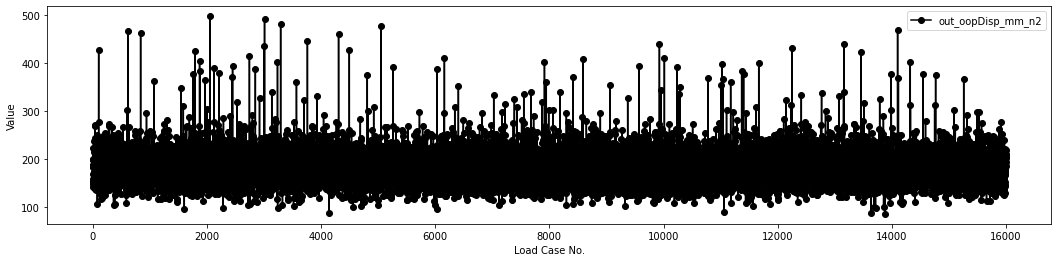

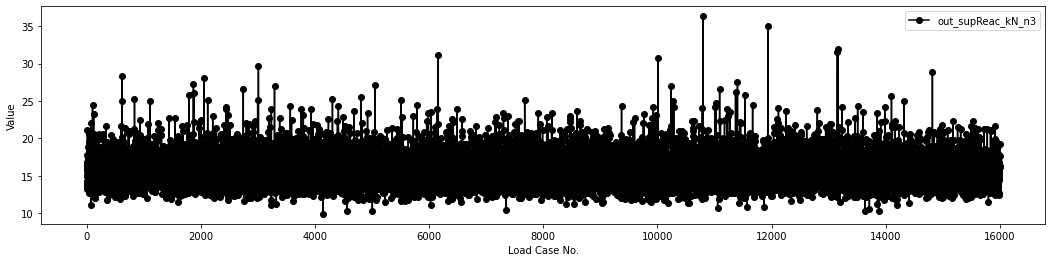

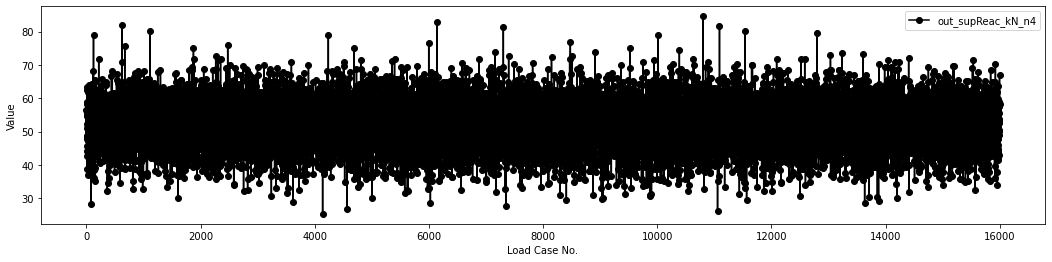

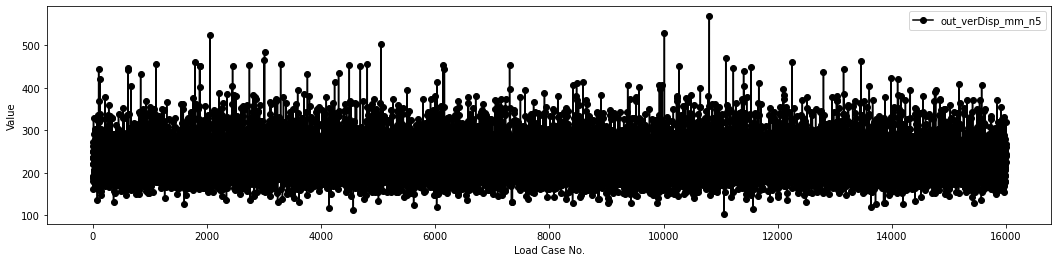

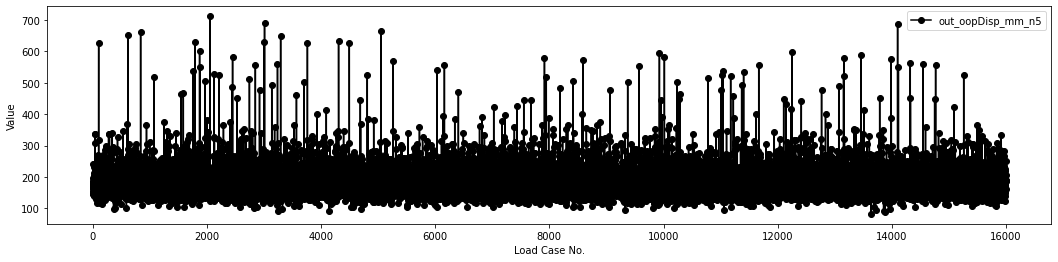

In [42]:
# Plot each result for each load case
for chan in res_df.columns[1:-1]:
    fig, ax = plt.subplots(figsize = (18, 4))
    ax.plot(res_df[chan], color = 'black', marker = 'o', zorder = 1, label = chan)
    ax.legend(loc = 'upper right')
    plt.xlabel('Load Case No.')
    plt.ylabel('Value')
plt.show()

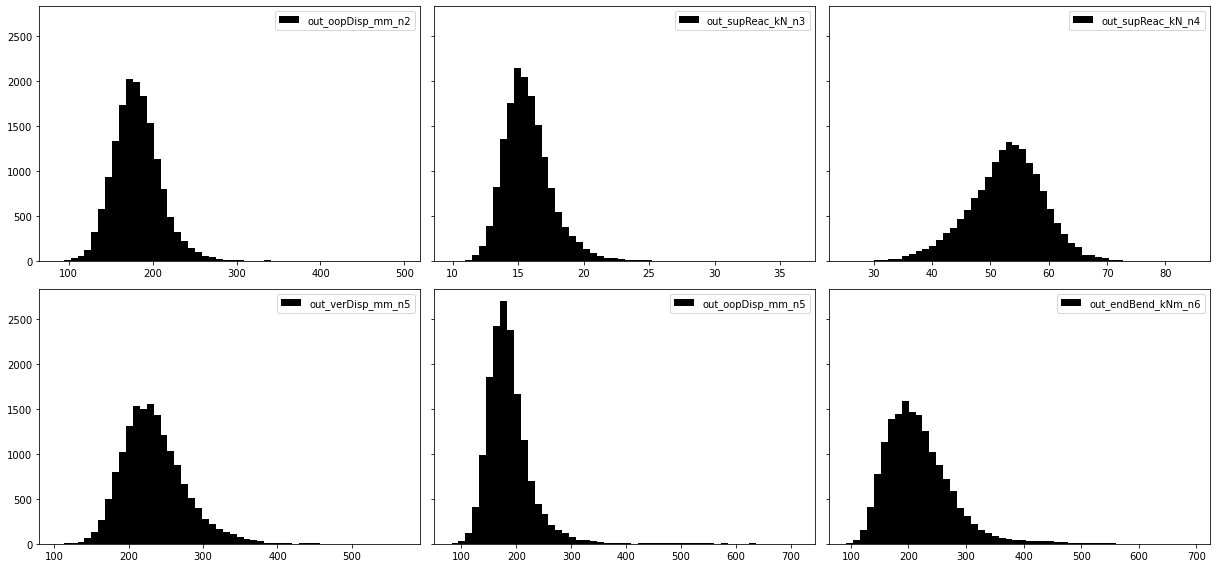

In [49]:
# Plot distributions of each result parameter
n_bins = 50
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True, figsize = (17, 8))
axs = axs.ravel()
drops = ['load_case']
for p, ref in enumerate(res_df.columns.drop(drops)):
    axs[p].hist(res_df[ref].values, bins=n_bins, label = ref, color = 'black')
    axs[p].legend(loc = 'upper right')